In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class PCA:
    def __init__(self, num_components):
        self.num_components = num_components
        self.eigen_components = None
        self.mean_point = None
        
    def fit(self, X):
        # calculate mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # calculate covariance
        cov = np.cov(X.T)   #np.cov works with X.T
        
        # calculate eigenvectors an eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T      # np.linalg.eig returns eigenvectors as columns
        
        # sort eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eignevalues_sorted = eigenvalues[sorted_indices]
        eigenvectors_sorted = eigenvectors[sorted_indices]
        
        # choose num_components eigenvectors
        self.eigen_components = eigenvectors_sorted[:self.num_components]
    
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.eigen_components.T)

### testing PCA algorithm

In [3]:
dataset = datasets.load_iris()

In [4]:
X = dataset.data
Y = dataset.target

In [5]:
pca = PCA(num_components=2)

In [6]:
pca.fit(X)

In [7]:
x_projected = pca.transform(X)

In [8]:
print(f'the shape of X = {X.shape}')
print(f'the shape of transformed X = {x_projected.shape}')

the shape of X = (150, 4)
the shape of transformed X = (150, 2)


In [9]:
x_0 = x_projected[:,0]
x_1 = x_projected[:,1]

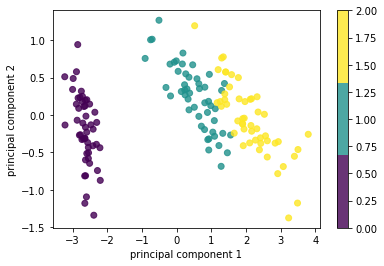

In [11]:
plt.scatter(x_0, x_1, c=Y, alpha=.8, cmap=plt.cm.get_cmap("viridis", 3))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar()